In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [6]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
#df = df.drop_duplicates()

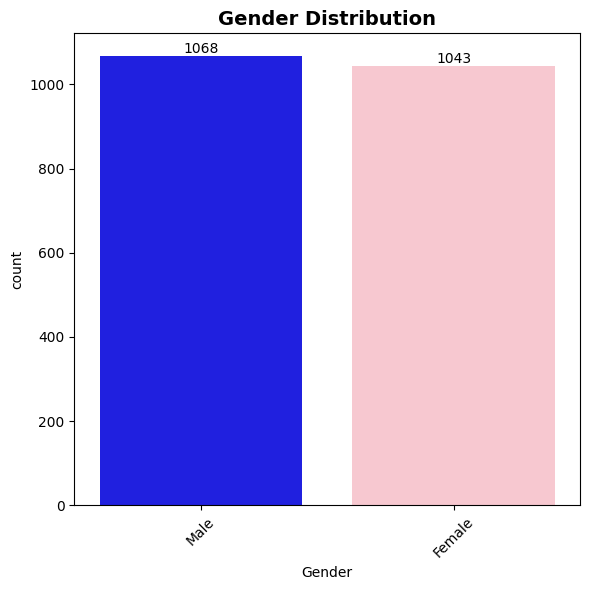

In [8]:
# Define the order of categories and corresponding colors
order_colors = {"Male": "blue", "Female": "pink"}

plt.figure(figsize=(6, 6))
sns.countplot(x="Gender", data=df, order=order_colors.keys(), palette=order_colors.values())
plt.title("Gender Distribution", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)

# Annotate each bar with its count
for i, count in enumerate(df["Gender"].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

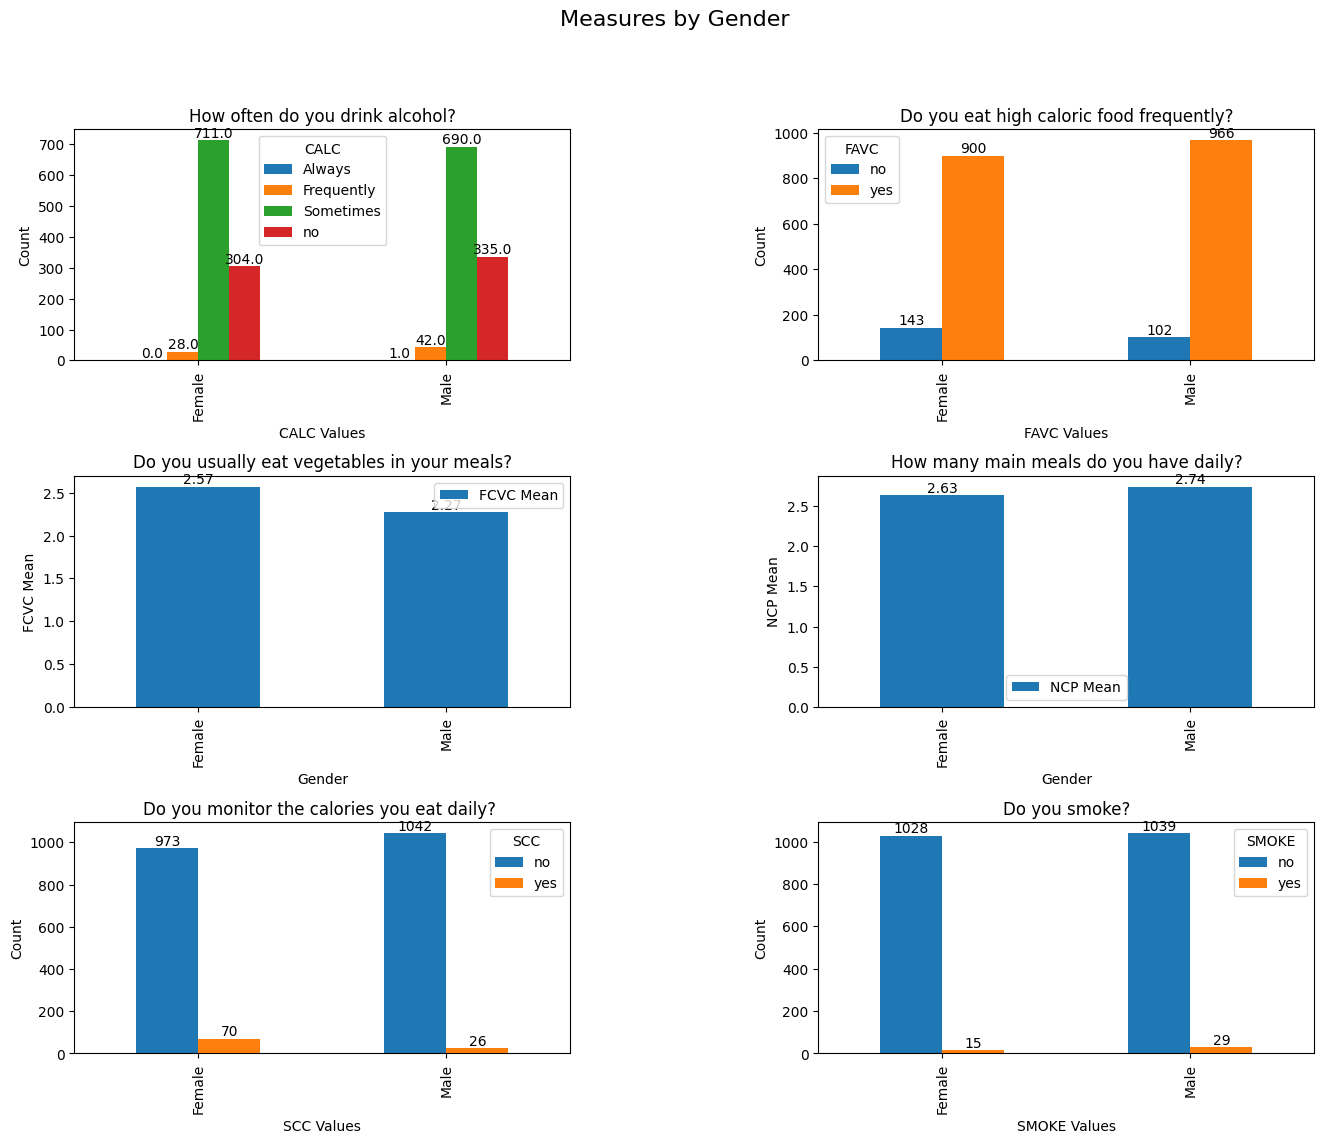

In [9]:
# Group the data by gender
grouped = df.groupby('Gender')

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.suptitle('Measures by Gender', fontsize=16)

# Visualize CALC
calc_counts = grouped['CALC'].value_counts().unstack()
calc_counts.plot(kind='bar', ax=axes[0, 0])

# Set title, labels, and annotations
axes[0, 0].set_title('How often do you drink alcohol?')
axes[0, 0].set_xlabel('CALC Values')
axes[0, 0].set_ylabel('Count')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                        ha='center', va='bottom')

# Visualize FAVC
favc_counts = grouped['FAVC'].value_counts().unstack()
favc_counts.plot(kind='bar', ax=axes[0, 1])

# Set title, labels, and annotations
axes[0, 1].set_title('Do you eat high caloric food frequently?')
axes[0, 1].set_xlabel('FAVC Values')
axes[0, 1].set_ylabel('Count')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                        ha='center', va='bottom')

# Visualize FCVC
fcvc_means = grouped['FCVC'].mean().reset_index()
fcvc_means.columns = ['Gender', 'FCVC Mean']
fcvc_means.set_index('Gender', inplace=True)
fcvc_means.plot(kind='bar', ax=axes[1, 0])

# Set title, labels, and annotations
axes[1, 0].set_title('Do you usually eat vegetables in your meals?')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('FCVC Mean')
for p in axes[1, 0].patches:
    bar_width = p.get_width()
    bar_height = p.get_height()
    bar_x = p.get_x()
    bar_middle = bar_x + bar_width / 2
    axes[1, 0].annotate(str(round(bar_height, 2)), (bar_middle, bar_height), ha='center', va='bottom')

# Visualize NCP
ncp_means = grouped['NCP'].mean().reset_index()
ncp_means.columns = ['Gender', 'NCP Mean']
ncp_means.set_index('Gender', inplace=True)
ncp_means.plot(kind='bar', ax=axes[1, 1])

# Set title, labels, and annotations
axes[1, 1].set_title('How many main meals do you have daily?')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('NCP Mean')
for p in axes[1, 1].patches:
    bar_width = p.get_width()
    bar_height = p.get_height()
    bar_x = p.get_x()
    bar_middle = bar_x + bar_width / 2
    axes[1, 1].annotate(str(round(bar_height, 2)), (bar_middle, bar_height), ha='center', va='bottom')

# Visualize SCC
scc_counts = grouped['SCC'].value_counts().unstack()
scc_counts.plot(kind='bar', ax=axes[2, 0])

# Set title, labels, and annotations
axes[2, 0].set_title('Do you monitor the calories you eat daily? ')
axes[2, 0].set_xlabel('SCC Values')
axes[2, 0].set_ylabel('Count')
for p in axes[2, 0].patches:
    axes[2, 0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Visualize SMOKE
smoke_counts = grouped['SMOKE'].value_counts().unstack()
smoke_counts.plot(kind='bar', ax=axes[2, 1])

# Set title, labels, and annotations
axes[2, 1].set_title('Do you smoke?')
axes[2, 1].set_xlabel('SMOKE Values')
axes[2, 1].set_ylabel('Count')
for p in axes[2, 1].patches:
    axes[2, 1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the plot
plt.show()

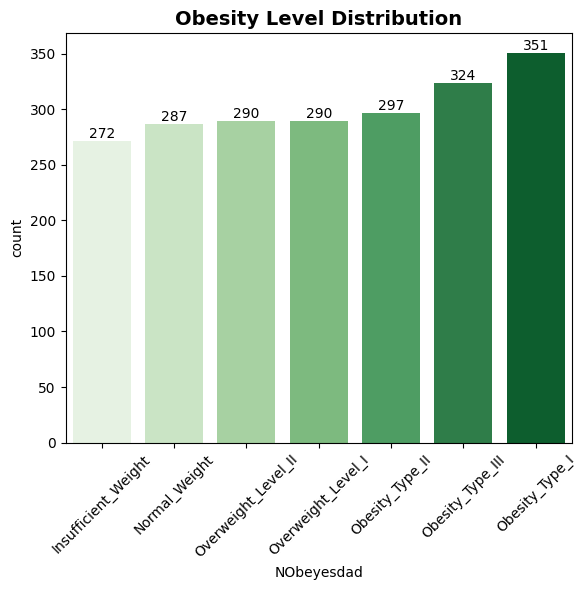

In [10]:
# Sort NObeyesdad in descending order
sorted_obesity_levels = df['NObeyesdad'].value_counts().index

plt.figure(figsize=(6, 6))
sns.countplot(x="NObeyesdad", data=df, order=sorted_obesity_levels[::-1], palette="Greens")
plt.title("Obesity Level Distribution", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)

# Annotate each bar with its count
for i, count in enumerate(df['NObeyesdad'].value_counts()[::-1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


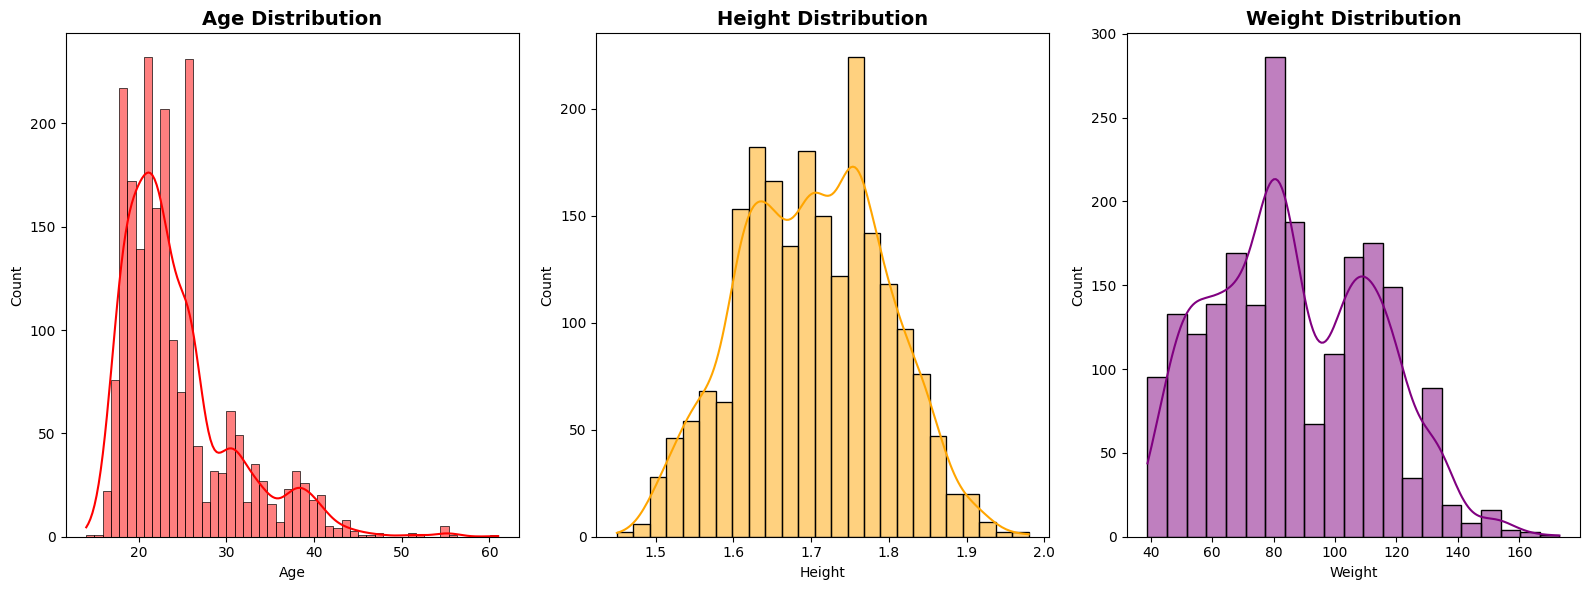

In [11]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.histplot(df["Age"].dropna(), kde=True, color="Red")
plt.title("Age Distribution", fontsize=14, fontweight="bold")

plt.subplot(1, 3, 2)
sns.histplot(df["Height"].dropna(), kde=True, color="Orange")
plt.title("Height Distribution", fontsize=14, fontweight="bold")

plt.subplot(1, 3, 3)
sns.histplot(df["Weight"].dropna(), kde=True, color="Purple")
plt.title("Weight Distribution", fontsize=14, fontweight="bold")
plt.tight_layout()

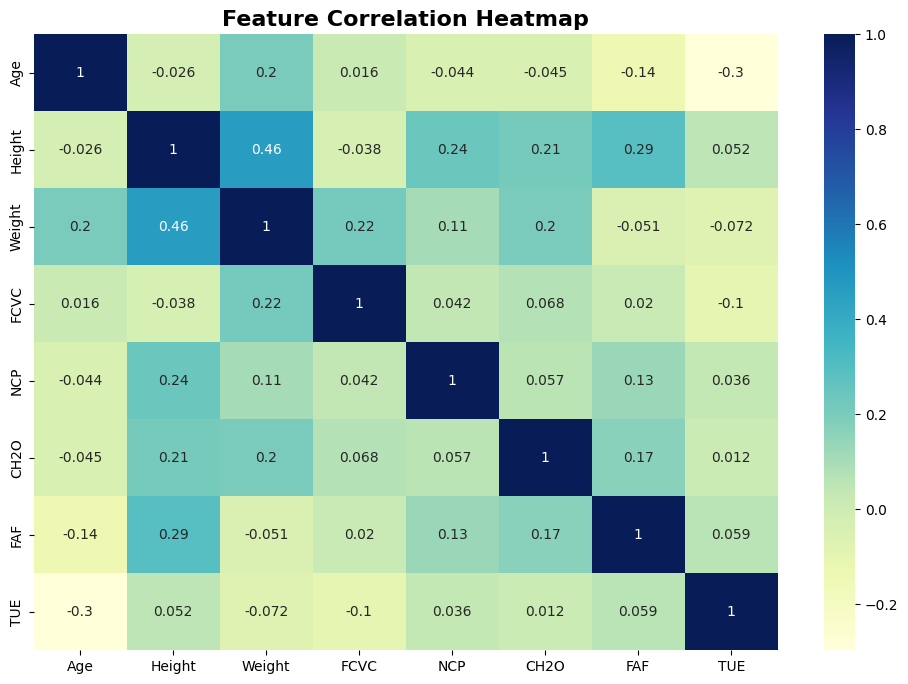

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight="bold")
plt.show()

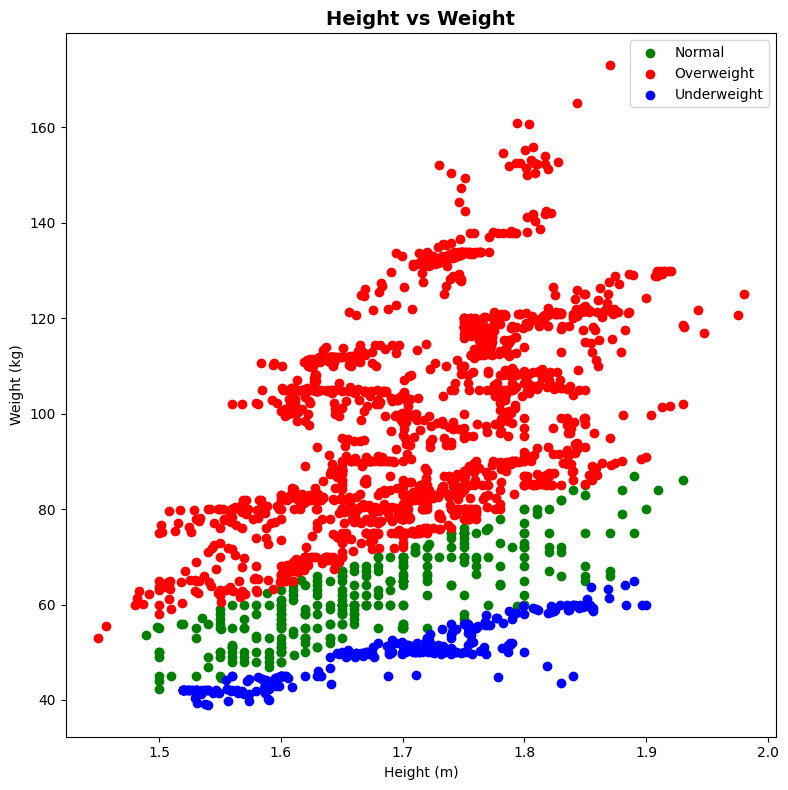

In [13]:
# Define BMI categories and corresponding colors
bmi_colors = {
    "Normal": "green",
    "Overweight": "red",
    "Underweight": "blue"
}

# Calculate BMI for each person in the dataset
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Create a new column to categorize BMI
df['BMI Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, np.inf], labels=["Underweight", "Normal", "Overweight"], right=False)

# Plot the scatterplot with colors based on BMI categories
plt.figure(figsize=(8, 8))
for category, color in bmi_colors.items():
    subset = df[df['BMI Category'] == category]
    plt.scatter(subset['Height'], subset['Weight'], color=color, label=category)

plt.title("Height vs Weight", fontsize=14, fontweight="bold")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.tight_layout()
plt.show()